Emma Alber, Data Science for Psychologists, June 2021

## Final Project: A Closer Look at the Human Freedom Index

### 1. Introduction
For more than a year now, citizens around the world have had to get used to terms like "lockdown" and "mandatory masks", as well as to the fact that their state suddenly imposes many and at times very strict rules to follow. This consequence of COVID-19 has fueled heated discussions about the concept of freedom in states whose residents otherwise pay little attention to the issue. Yet the freedom of people has been an important matter before this pandemic, and in many countries the freedom to go to the barber shop is the least of citizens' concerns when it comes to their personal liberty.
This project aims to shed light at the intricacies of human freedom (HF) around the world in the past decades until 2018 by analyzing data used in a paper about the Human Freedom Index (Vásquez & McMahon, 2020). After some background information about the concepts and the data has been given, the distribution of human freedom in different nations will be visualized and compared. Next, the influence of specific factors such as gender, size of government or business regulations on HF will be assessed. Finally, various models to predict HF will be built, tested and the best-fitting one will be chosen.

### 2. Background
There are countless ways to define freedom. This paper adopts the approach of Vásquez and McMahon, authors of the Human Freedom Index 2020 report, who use "negative rights" or "negative liberty" as a working definition of human freedom in their paper. The term negative rights was coined by the philosopher Isaiah Berlin, who wrote that negative liberty concerns "the area within which the subject — a person or group of persons — is or should be left to do or be what he is able to do or be, without interference by other persons (Berlin, 1969, p. 119)." Accordingly, this paper will compare countries and regions exclusively on the notion of how much (or little) their citizens experience constraint of various forms - especially by their government. While data collection and analysis can be done in a relatively objective manner, it is important to note that the political attitudes of the researchers can play a role, particularly in the selection of variables to be collected and in the interpretation of the results. It should be mentioned here that the editors of the HFI, which is the sole data source for this paper, are two libertarian "think tanks" based in the U.S. and Canada, respectively. Vásquez and McMahon (2020) collected and analyzed a broad range of variables operationalizing their definition of freedom from 162 countries. All attained measures were assigned values between 0 and 10, with a higher number representing more freedom (i.e., more safety, human rights, diversity, etc.). The data was aggregated into three indices: An index of personal freedom (PF) and for economic freedom (EF) respectively, whose combination results in the main index of HI. While PF serves as an index for specific personal freedoms such as freedom of religion, expression and identity, EF measures the possibility to engage in voluntary (financial) exchange and competition, and the safety of people and their property. The results of the HFI allow us to evaluate the development of HF over the past decade (since the first index was created in 2008) and allows us to rank and compare countries, as well as to assess the influence of specific variables on HF.

### 3. Statistical Analyses

#### 3.0 Data Cleaning and Variables of Interest
In order to work with the dataset, it needs to be cleaned and brought into tidy format first.

In [2]:
library(tidyverse)
library(dplyr)
library(ggplot2)

HFI_raw <- read.csv('Data HFI/hfi_cc_2020.csv') #load dataset
head(HFI_raw) #look at structure of dataset
nrow(HFI_raw)

NAs <- complete.cases(HFI_raw) 
summary(NAs) #check amount of NAs
HFI_NONA <- na.omit(HFI_raw) #remove NAs in case I need a df without NAs later
nrow(HFI_NONA)

,X,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,⋯,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,2018,ALB,Albania,Eastern Europe,7.81,43,2,6.0,4.8,⋯,6.7,9.7,5.4,5.6,7.2,6.7,7.7,7.80,26,9.26
2,1,2017,ALB,Albania,Eastern Europe,7.78,44,2,6.3,4.4,⋯,6.7,9.7,6.0,6.0,7.2,7.0,7.9,7.70,36,9.26
3,2,2016,ALB,Albania,Eastern Europe,7.63,50,2,6.7,4.5,⋯,6.0,9.7,6.0,7.3,7.1,7.0,7.6,7.69,36,7.50
4,3,2015,ALB,Albania,Eastern Europe,7.55,52,2,6.7,4.5,⋯,6.0,9.7,6.0,7.3,7.1,7.0,7.7,7.70,34,7.50
5,4,2014,ALB,Albania,Eastern Europe,7.65,48,2,6.1,4.8,⋯,6.0,9.7,6.0,7.2,6.0,6.8,7.8,7.65,37,7.50
6,5,2013,ALB,Albania,Eastern Europe,7.52,54,2,5.6,5.0,⋯,6.0,9.8,6.0,7.2,6.0,6.7,7.4,7.55,42,7.50


[1] 1782

   Mode   FALSE    TRUE 
logical    1518     264 

[1] 264

The overview of the dataset shows us that we don't need to change much in the format, as it already is in tidy format - the variables are all stored in columns, there is only one variable per column and they all have headers. However, there are quite a few NAs. Because they are systematic (certain countries have more NAs), I will work with the original dataset with NAs and only use the one without NAs if the analysis cannot handle NAs.

There are many variables of interest, and an explanation for them all can be found in the methodology part starting on p. 377 of the original paper: https://www.fraserinstitute.org/sites/default/files/human-freedom-index-2020.pdf. For the sake of space and reading time, I will only list the most important and not self-explanatory ones:
- hf_score: the HF score of this country on a scale from 1-10 with 10 being the highest in freedom
- hf_rank: the HF rank out of 162 assessed countries 
- "womens_freedom": the HF score specifically for women, aggregated from 5 variables measuring women's freedom
- anything with "pf": measures personal freedom
- anything with "ef": measures economic freedom


### 3.1 The Distribution of Freedom in the World

To get an overview of the state of freedom in the world, I will start by inspecting the distribution of freedom in the world and in different regions. We start out by looking at the complete data for the world:

Warning message:
“Removed 80 rows containing non-finite values (stat_density).”


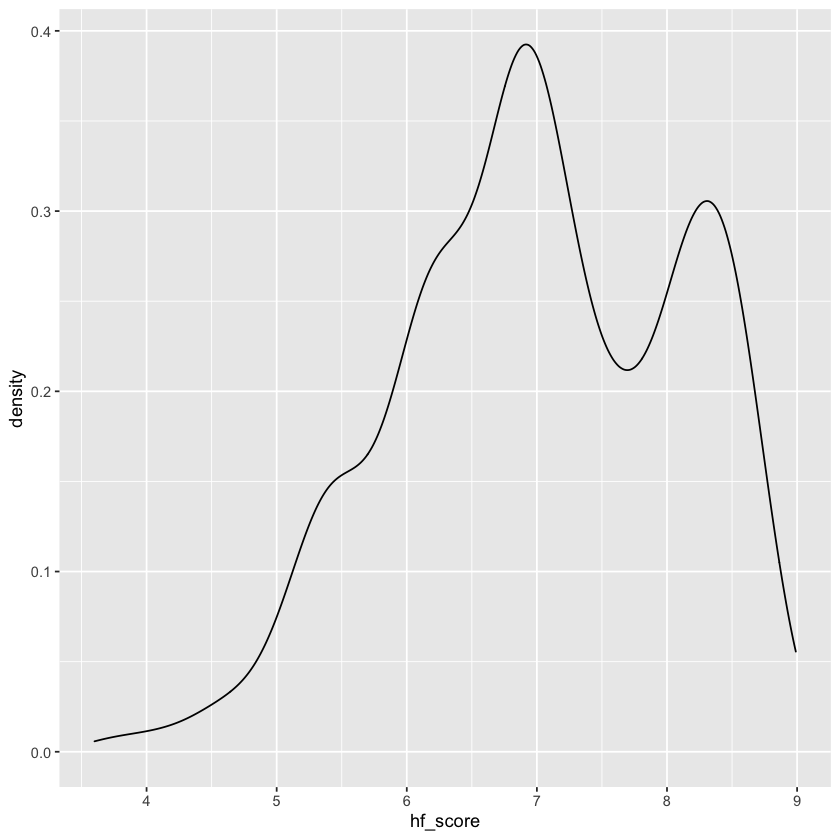

In [3]:
#plot histogram for variable "HF_score" for all available countries
#the warning message is because there were NA for some countries that have not been in the list since 2008, so it's not an issue here
HF_distr_world_decade <- ggplot(HFI_raw, aes(x=hf_score)) + geom_density()
HF_distr_world_decade 

The plots show that HF has a bimodal distribution with the biggest amount of countries at a HFI around 6.75, and another smaller peak at around 8.25. This is, however, the mean from all 10 years that we have data on. Let's see what the distribution looked like only in 2018.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.970   6.220   6.920   6.933   7.862   8.870 

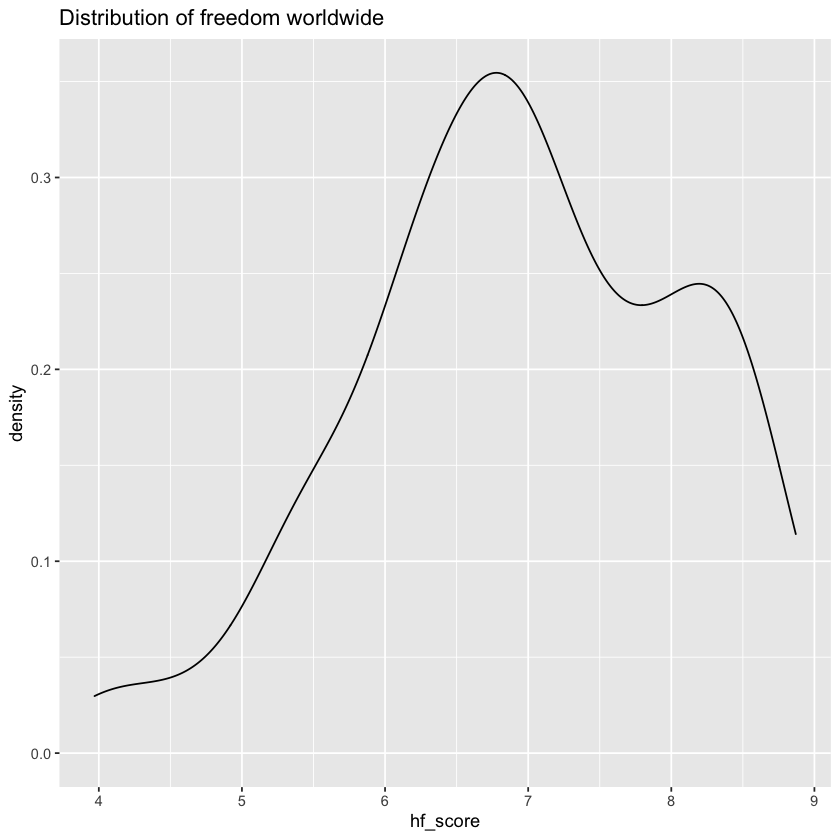

In [4]:
#extract only values for 2018
HFI_2018 <- HFI_raw %>% filter(year == 2018)

#find average HF score in 2018
summary(HFI_2018$hf_score)

#plot histogram for variable "HF_score" for the world on 2018
HF_distr_world_2018 <- ggplot(HFI_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom worldwide")
HF_distr_world_2018

The summary tells us that the mean value of HF worldwide in 2018 was 6.9.
The plot shows that in 2018, there still is a bimodal distribution with approximately the same values at its peaks (6.75 and 8.25), but the peaks have gotten less extreme - this shows that there is a bigger amount of countries with an HFI between 7 and 9 compared to the aggregated data for the decade. 
Next, I will show what the distribution in 2018 looked like for different regions in the world.

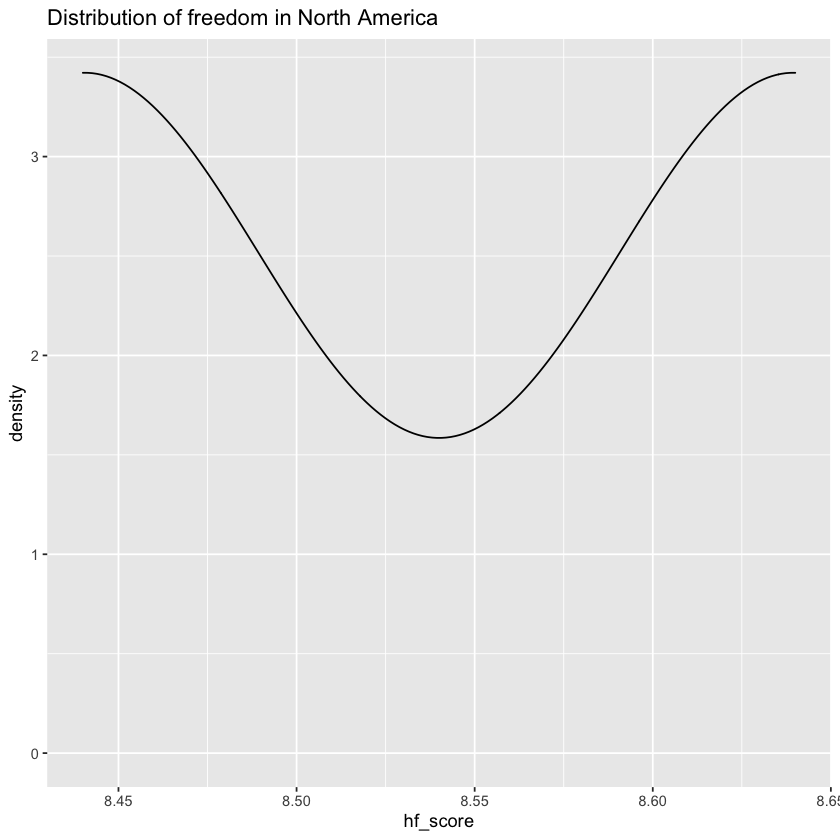

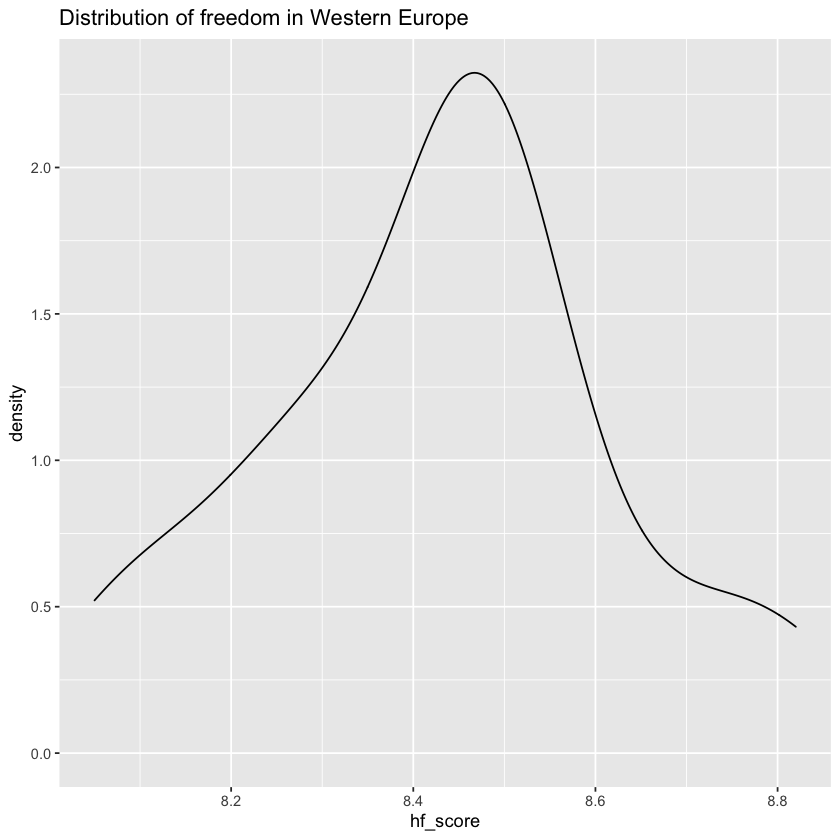

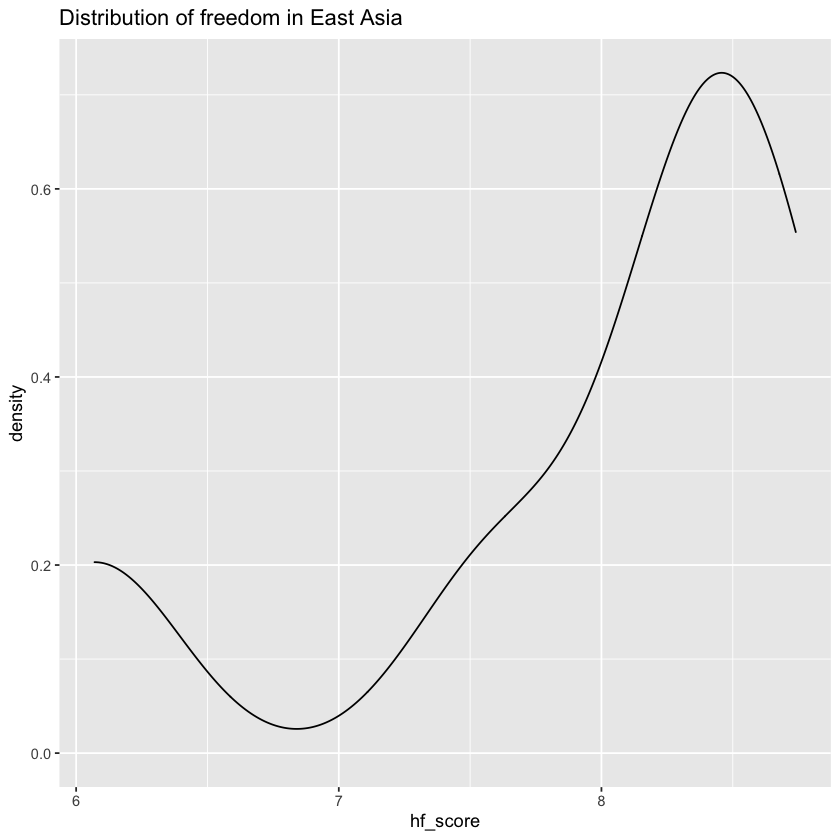

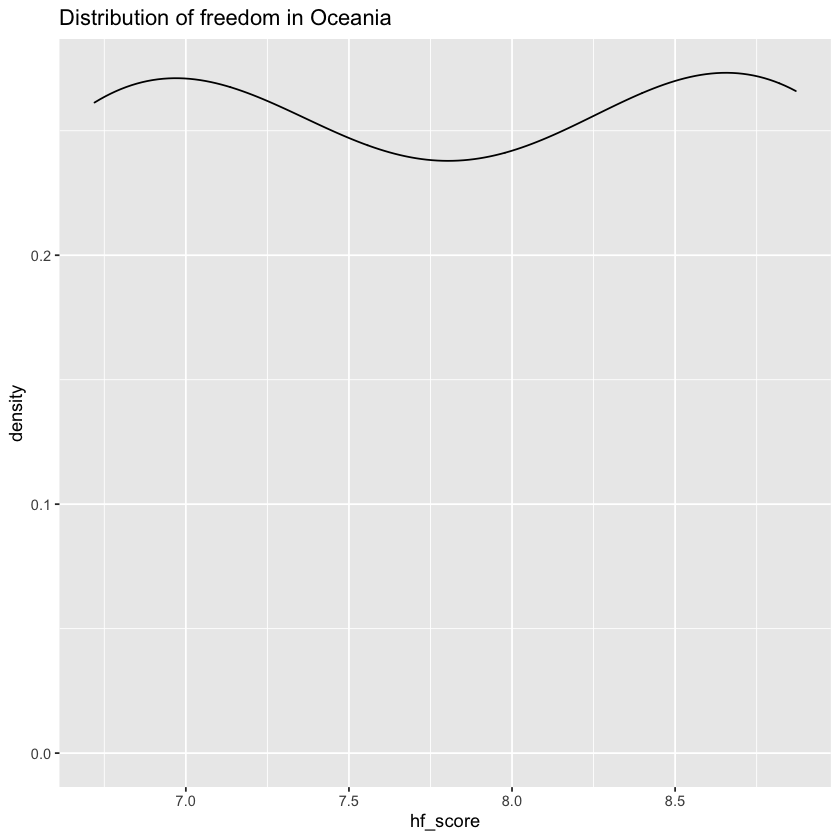

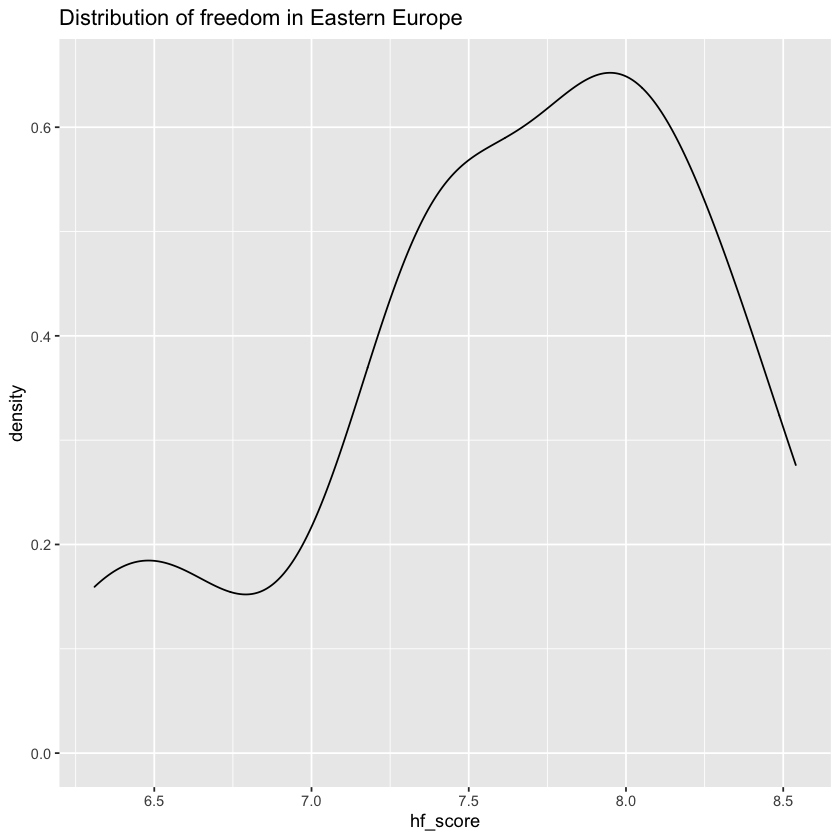

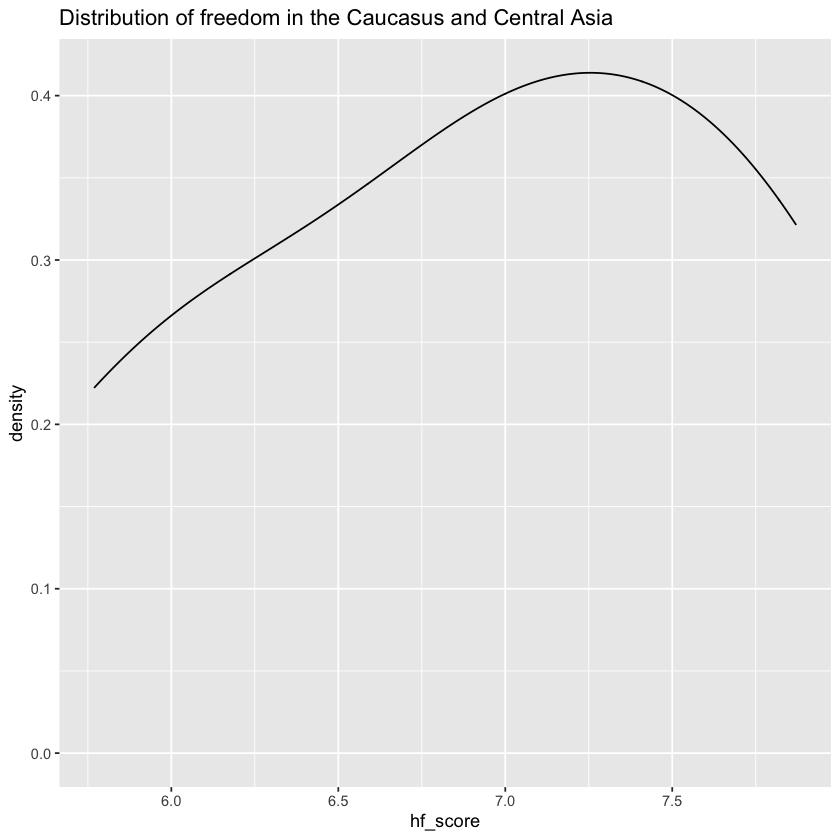

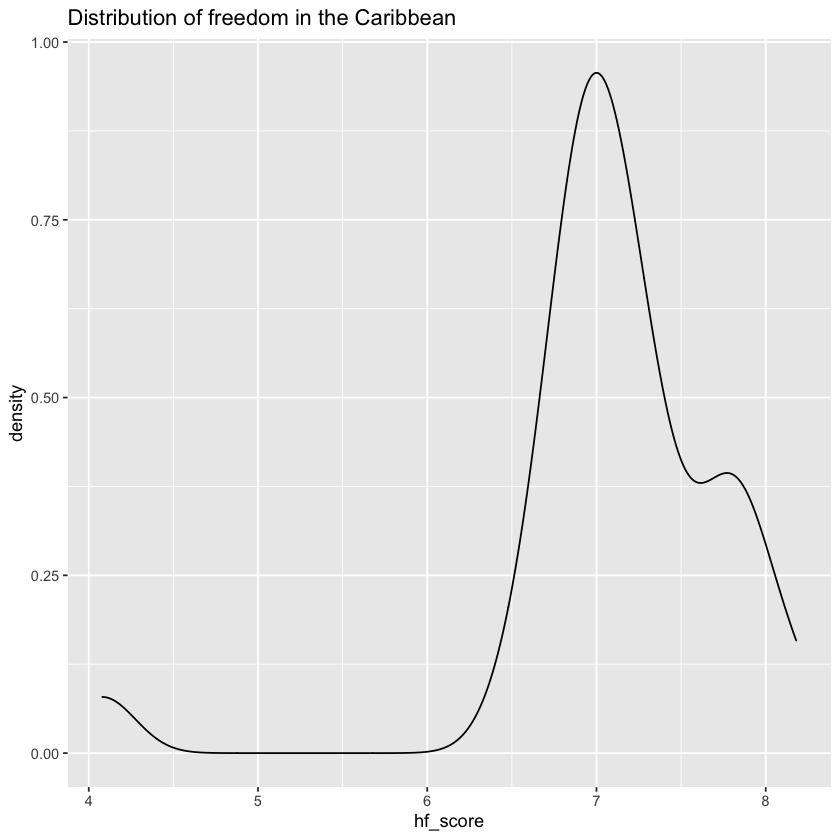

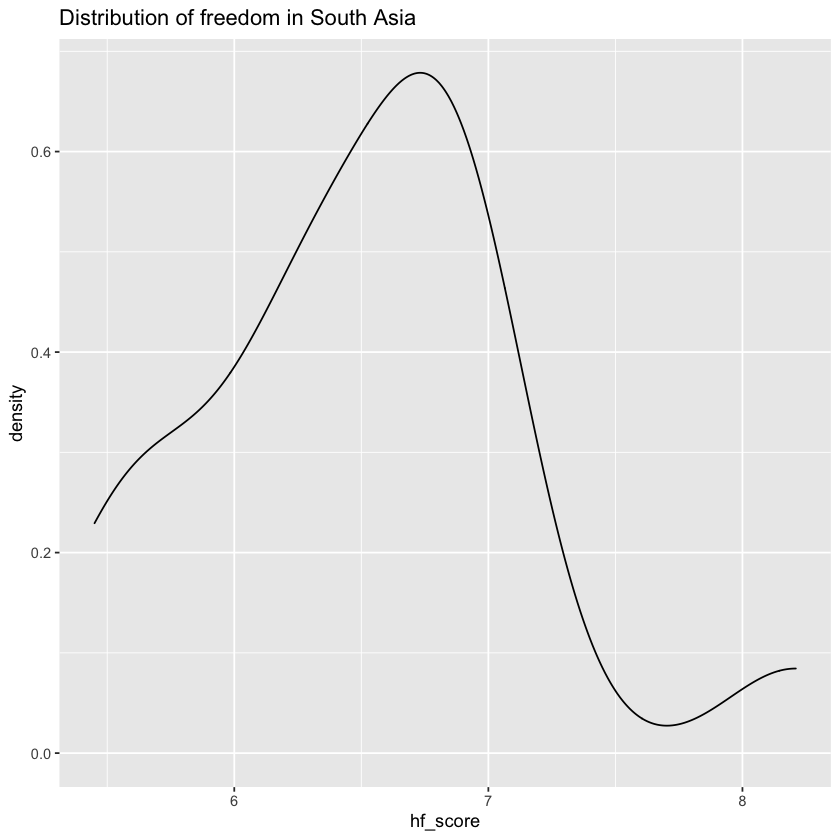

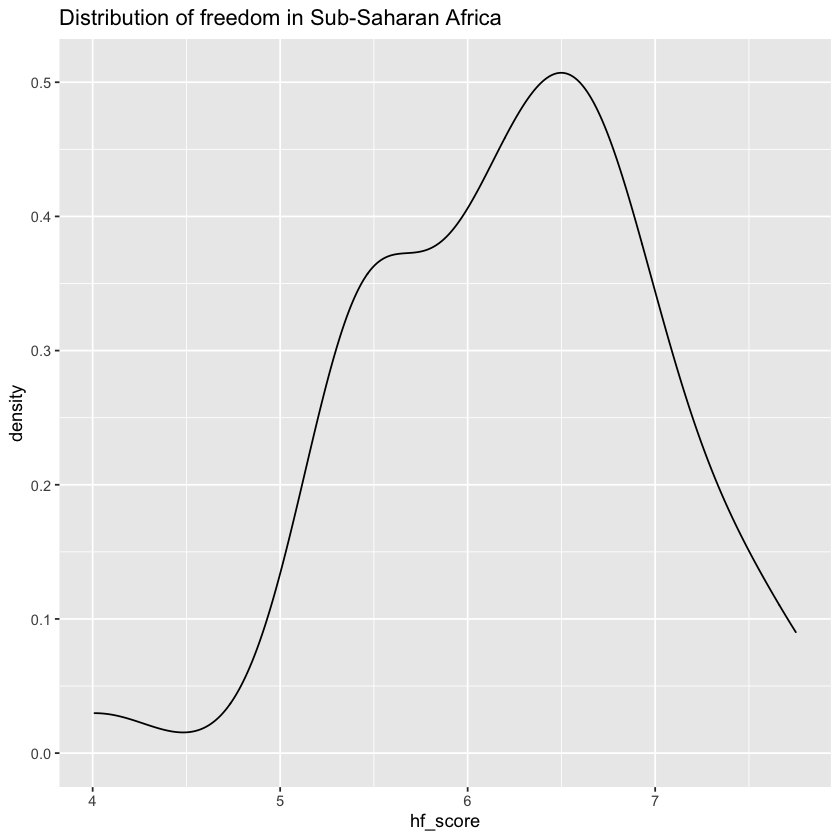

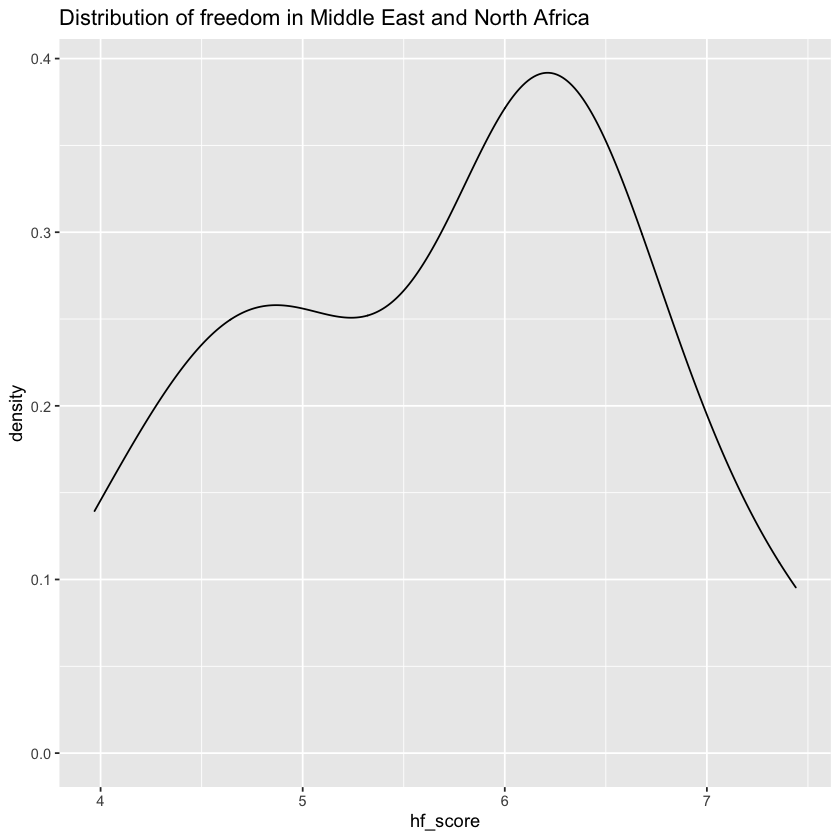

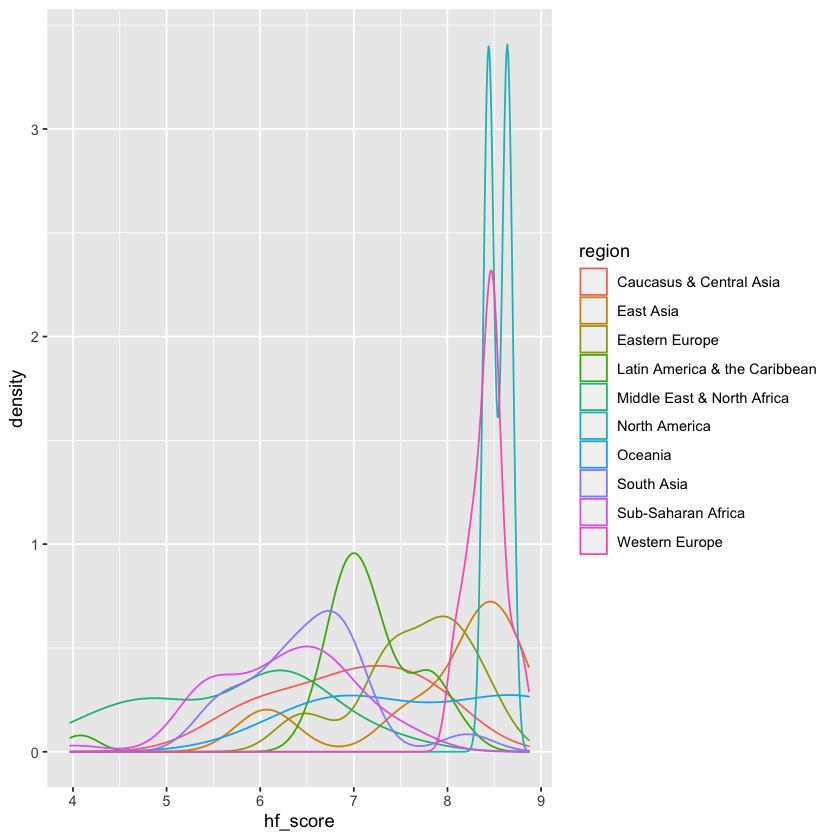

In [5]:
#extract only values for North America
HFI_NorthAmerica_2018 <- HFI_2018 %>% filter(region == "North America")
#plot histogram for variable "HF_score" for North America
HFI_distr_NorthAmerica_2018 <- ggplot(HFI_NorthAmerica_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in North America")
HFI_distr_NorthAmerica_2018

#plot histogram for variable "HF_score" for Western Europe
HFI_WesternEurope_2018 <- HFI_2018 %>% filter(region == "Western Europe")
HFI_WesternEurope_2018 <- ggplot(HFI_WesternEurope_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Western Europe")
HFI_WesternEurope_2018

#plot histogram for variable "HF_score" for East Asia
HFI_EastAsia_2018 <- HFI_2018 %>% filter(region == "East Asia")
HFI_EastAsia_2018 <- ggplot(HFI_EastAsia_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in East Asia")
HFI_EastAsia_2018

#plot histogram for variable "HF_score" for Oceania
HFI_Oceania_2018 <- HFI_2018 %>% filter(region == "Oceania")
HFI_Oceania_2018 <- ggplot(HFI_Oceania_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Oceania")
HFI_Oceania_2018

#plot histogram for variable "HF_score" for Eastern Europe
HFI_EastEu_2018 <- HFI_2018 %>% filter(region == "Eastern Europe")
HFI_EastEu_2018 <- ggplot(HFI_EastEu_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Eastern Europe")
HFI_EastEu_2018

#plot histogram for variable "HF_score" for Caucasus & Central Asia
HFI_CentAsia_2018 <- HFI_2018 %>% filter(region == "Caucasus & Central Asia")
HFI_CentAsia_2018 <- ggplot(HFI_CentAsia_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in the Caucasus and Central Asia")
HFI_CentAsia_2018

#plot histogram for variable "HF_score" for Latin America & the Caribbean
HFI_LatinAmerica_2018 <- HFI_2018 %>% filter(region == "Latin America & the Caribbean")
HFI_LatinAmerica_2018 <- ggplot(HFI_LatinAmerica_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in the Caribbean")
HFI_LatinAmerica_2018

#plot histogram for variable "HF_score" for South Asia
HFI_SouthAsia_2018 <- HFI_2018 %>% filter(region == "South Asia")
HFI_SouthAsia_2018 <- ggplot(HFI_SouthAsia_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in South Asia")
HFI_SouthAsia_2018

#plot histogram for variable "HF_score" for Sub-Saharan Africa
HFI_SubSAfrica_2018 <- HFI_2018 %>% filter(region == "Sub-Saharan Africa")
HFI_SubSAfrica_2018 <- ggplot(HFI_SubSAfrica_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Sub-Saharan Africa")
HFI_SubSAfrica_2018

#plot histogram for variable "HF_score" for Middle East & North Africa
HFI_NorthAfrica_2018 <- HFI_2018 %>% filter(region == "Middle East & North Africa")
HFI_NorthAfrica_2018 <- ggplot(HFI_NorthAfrica_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Middle East and North Africa")
HFI_NorthAfrica_2018

#plot histograms for all regions and give each region their own color
HFI_2018_all <- ggplot(HFI_2018, aes(hf_score, color = region)) + geom_density()
HFI_2018_all

The plots above show how the distribution and the average values of HF in 2018 vary substantially depending on to the region we look at. This implies that the development of HF differs from region to region as well. 
Next, I will show how the HF scores of the entire world and then more specifically of different countries have developed over the past decade.

### 3.2 The Development of Freedom Since 2008

The plot below shows how the average of HF has changed from 2008-2018. We can see that overall, there seems to be a very slight decline in the average HF score since 2008. 
Next, I plotted this development for each region. The HF scores seem to have stayed rather stable since 2008 for most regions. Overall, the region of Middle East & North Africa seems to have seen the stongest decline in HF over the past decade. 
In order to take a closer look at the development of HF over time, I plotted the development of HF for each country in the different regions. This step shows very well that the average stability of the HF is not representative for many countries in various regions! In some regions, e.g. Sub-Saharan Africa, the span between highest and lowest HF score is very big, and many countries show either a steep decline (e.g., Venezuela or Syria) or a steep growth curve (e.g., Myanmar or Iceland) in HF between 2008-2018. If Iceland's steep growth curve surprises you: This can probably be explained by an increase of the economic freedom index stemming from lower "State Ownership of Assets"; the personal freedom index has been high and stable over time.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 80 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 80 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 80 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 80 rows containing missing values (geom_point).”


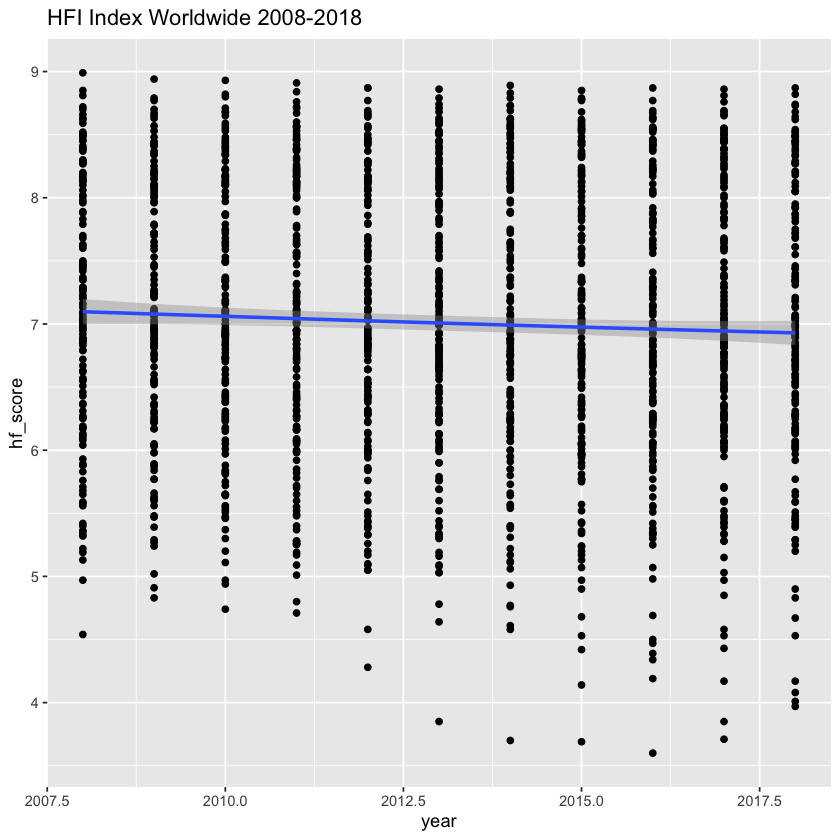

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



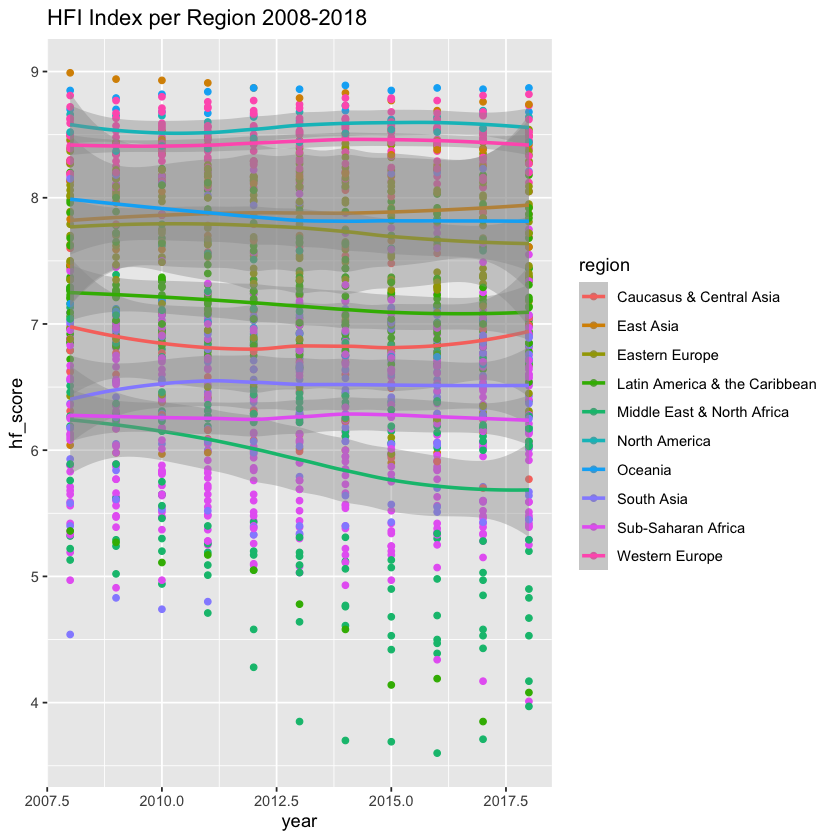

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



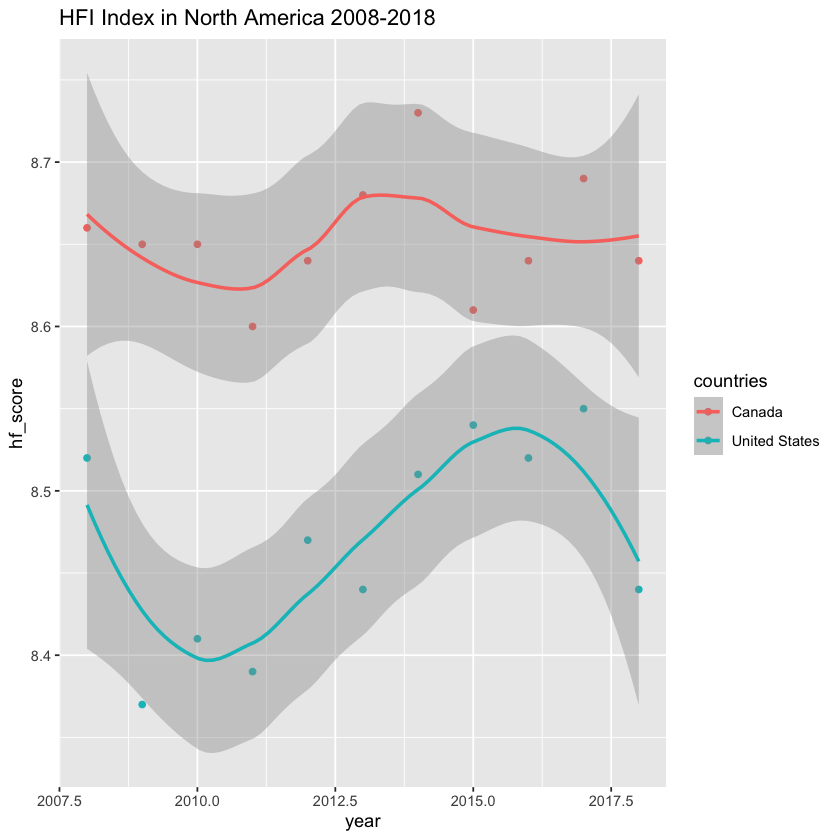

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



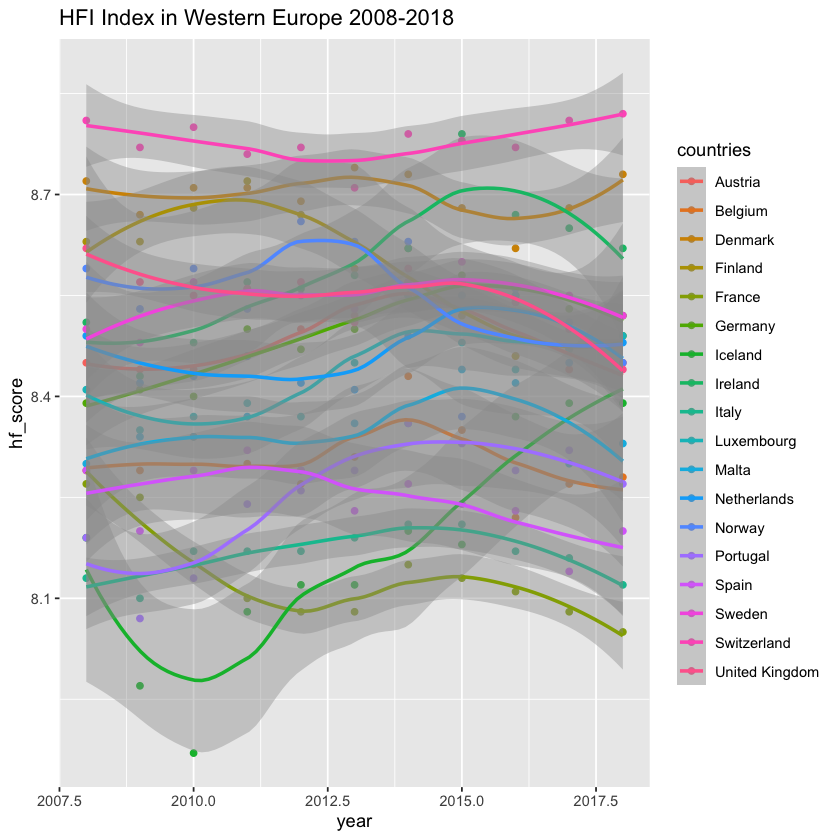

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



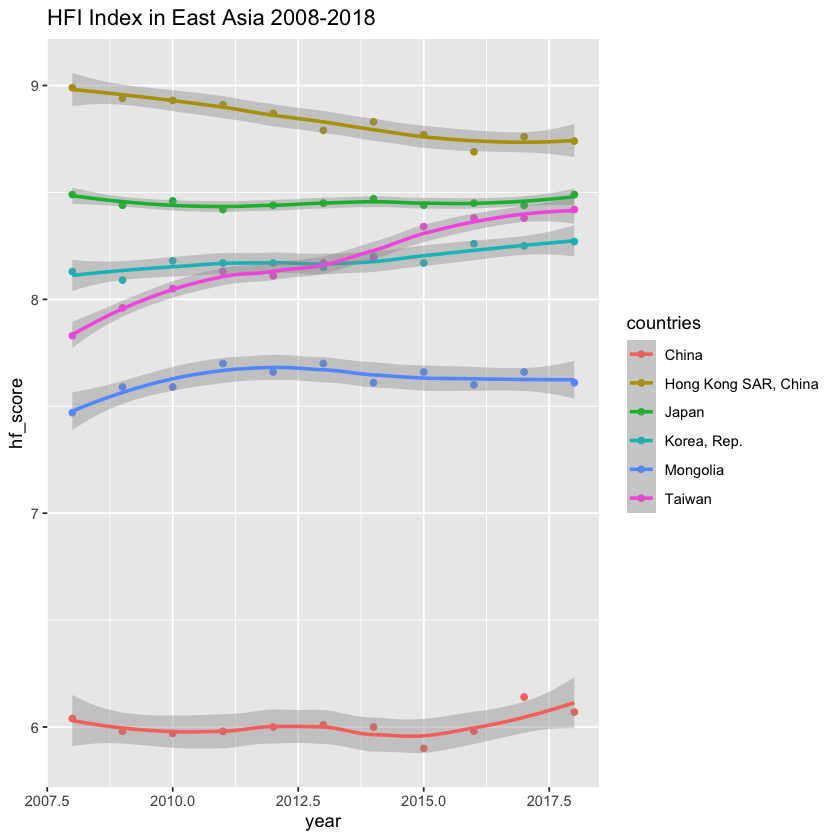

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2016”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data v

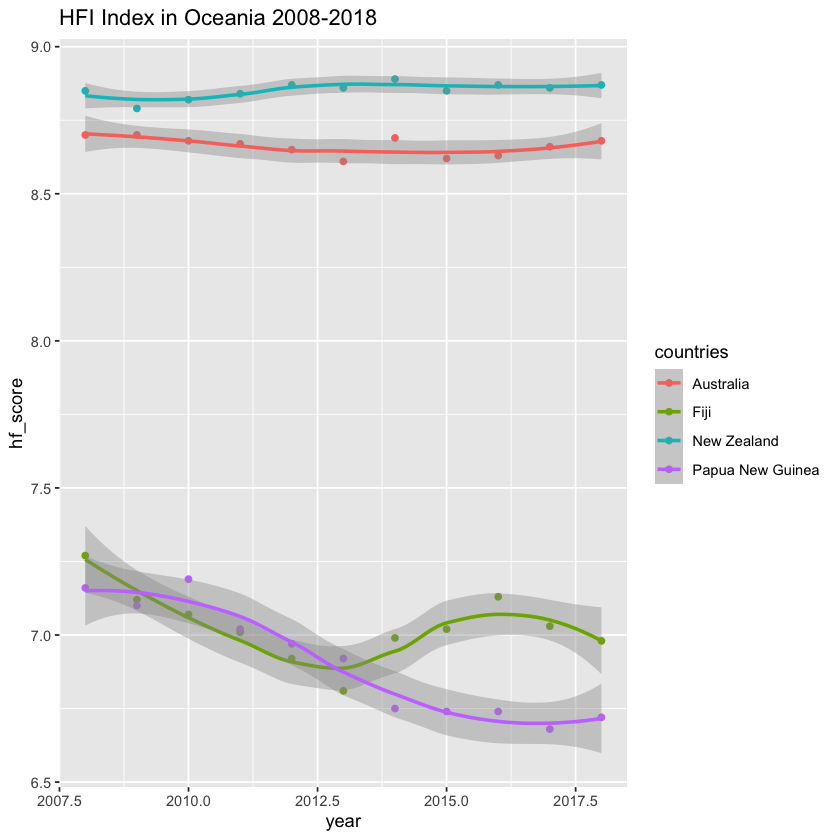

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


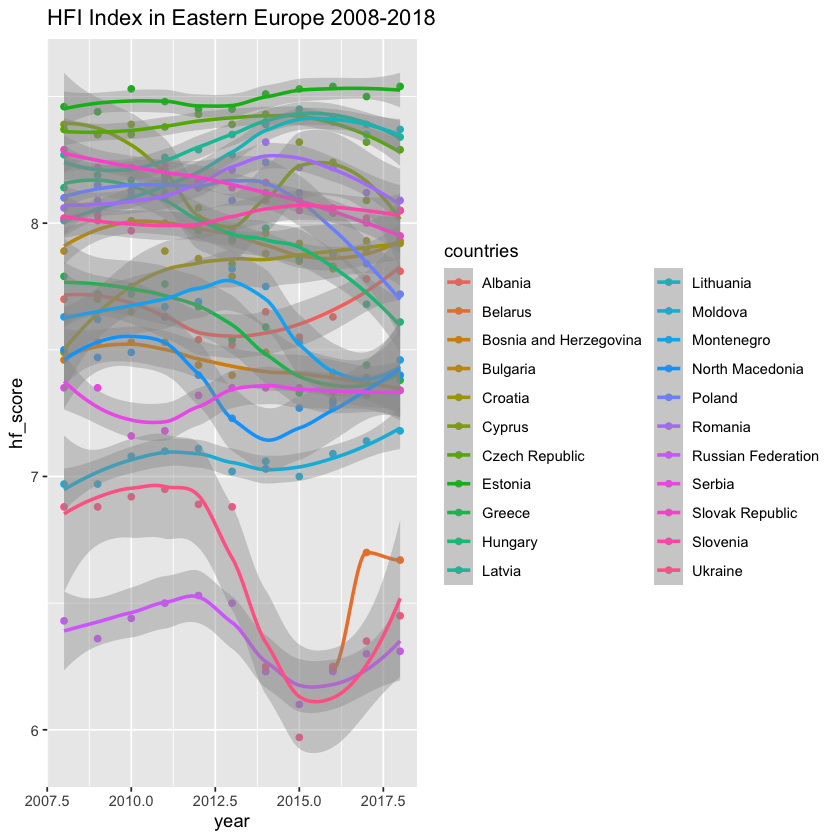

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


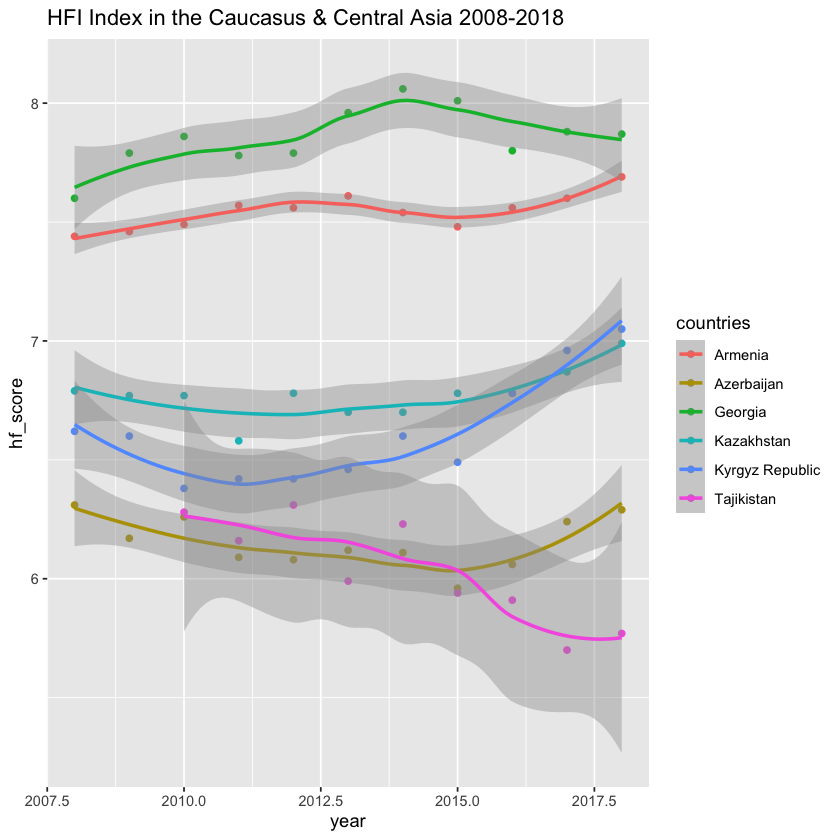

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 17 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs wurden erzeugt”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs wurden erzeugt”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2014”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.02”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal co

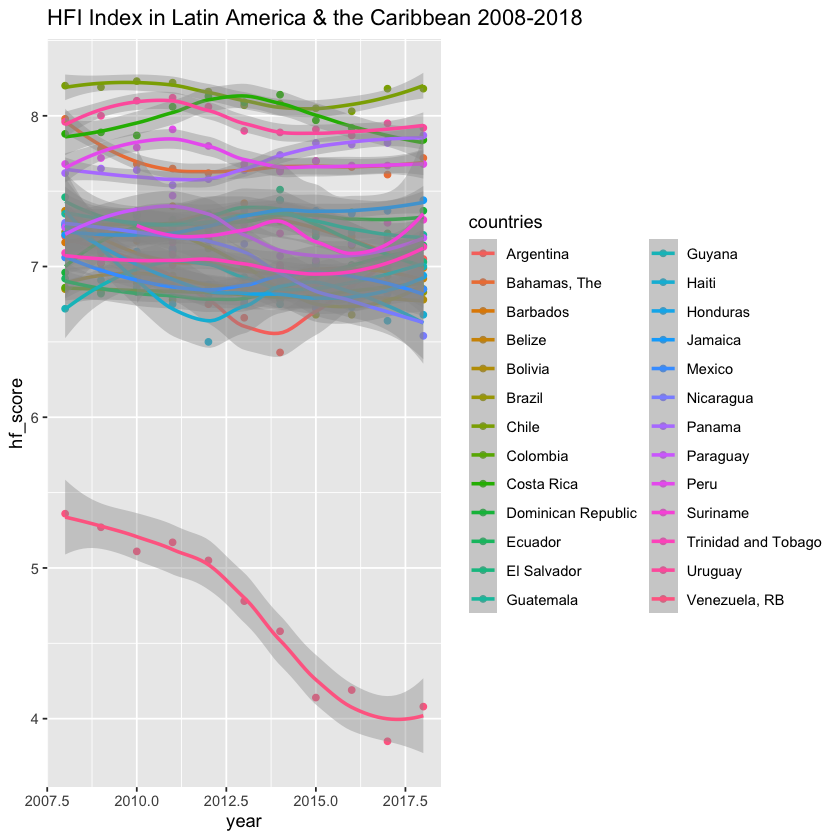

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs wurden erzeugt”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs wurden erzeugt”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2014”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.02”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal co

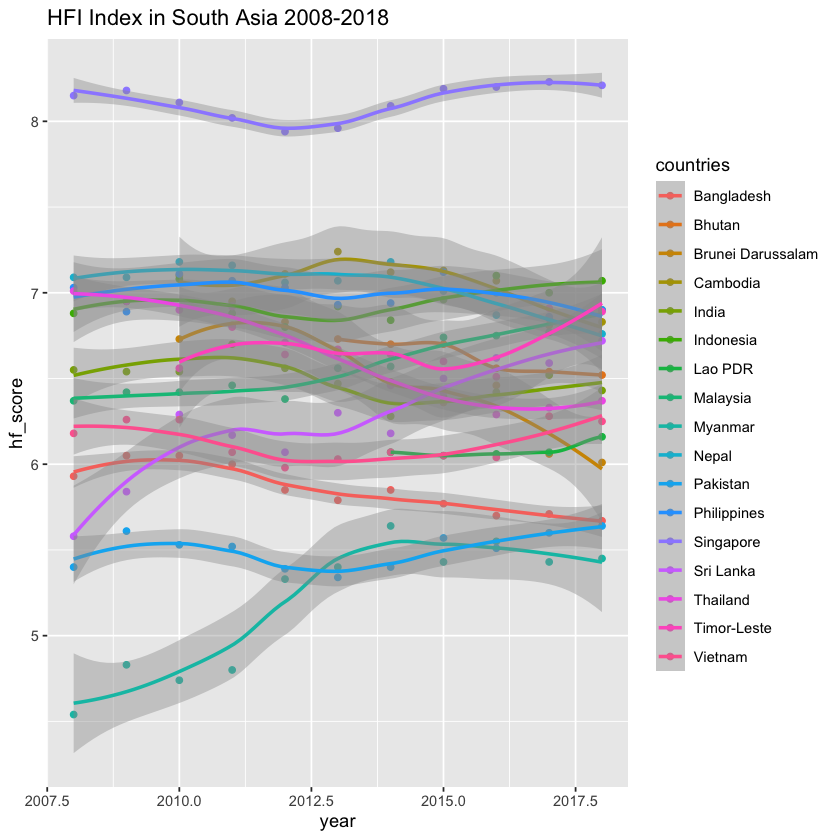

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 21 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2016”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data 

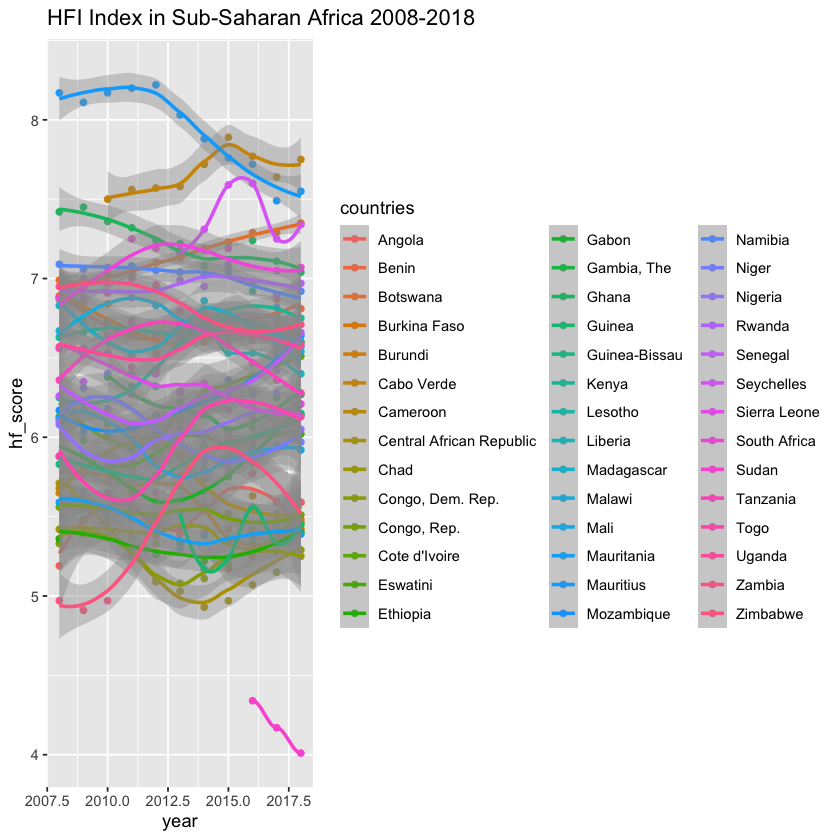

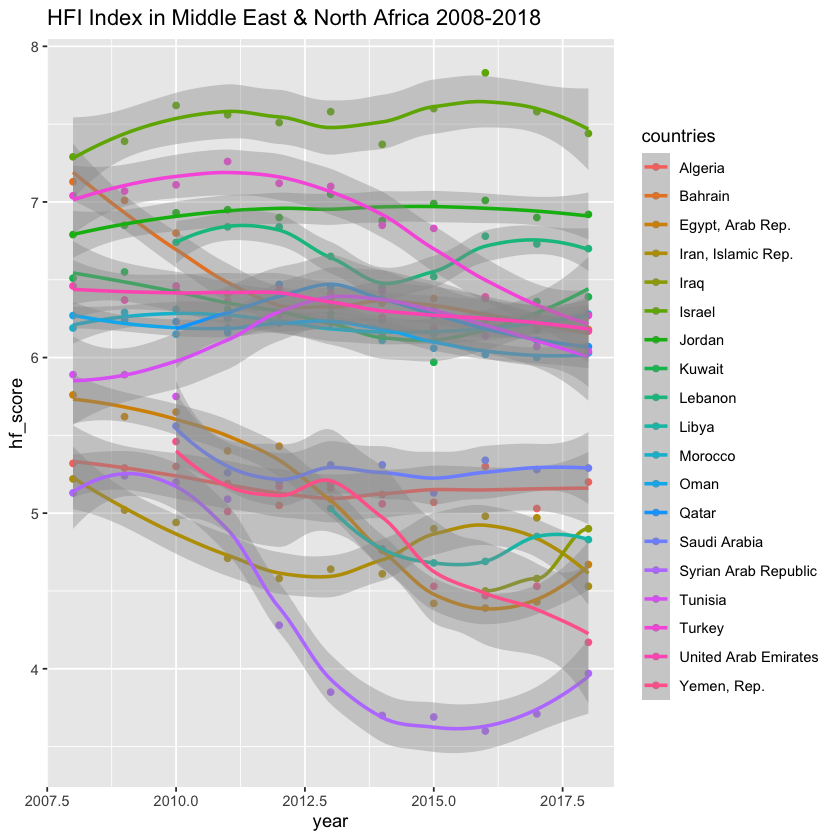

In [9]:
#plot correlation of hf_score with time 
HFI_development_world <- ggplot(HFI_raw, aes(year, hf_score)) + geom_point() + geom_smooth() + ggtitle("HFI Index Worldwide 2008-2018")
HFI_development_world

#plot regression of hf_score on time for each region
HFI_development_regions <- ggplot(HFI_raw, aes(year, hf_score, color = region)) + geom_point() + geom_smooth() + ggtitle("HFI Index per Region 2008-2018")
HFI_development_regions 
                                
#plot regression of hf_score on time for specific countries in the regions
HFI_NorthAmerica <- HFI_raw %>% filter(region == "North America")
HFI_dev_NorthAmerica <- ggplot(HFI_NorthAmerica, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in North America 2008-2018")
HFI_dev_NorthAmerica

HFI_WesternEurope <- HFI_raw %>% filter(region == "Western Europe")
HFI_dev_WesternEurope <- ggplot(HFI_WesternEurope, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Western Europe 2008-2018")
HFI_dev_WesternEurope

HFI_EastAsia <- HFI_raw %>% filter(region == "East Asia")
HFI_dev_EastAsia <- ggplot(HFI_EastAsia, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in East Asia 2008-2018")
HFI_dev_EastAsia

HFI_Oceania <- HFI_raw %>% filter(region == "Oceania")
HFI_dev_Oceania <- ggplot(HFI_Oceania, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Oceania 2008-2018")
HFI_dev_Oceania

HFI_EastEu <- HFI_raw %>% filter(region == "Eastern Europe")
HFI_dev_EastEu <- ggplot(HFI_EastEu, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Eastern Europe 2008-2018")
HFI_dev_EastEu

HFI_CentralAsia <- HFI_raw %>% filter(region == "Caucasus & Central Asia")
HFI_dev_CentralAsia <- ggplot(HFI_CentralAsia, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in the Caucasus & Central Asia 2008-2018")
HFI_dev_CentralAsia

HFI_LatinAmerica <- HFI_raw %>% filter(region == "Latin America & the Caribbean")
HFI_dev_LatinAmerica <- ggplot(HFI_LatinAmerica, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Latin America & the Caribbean 2008-2018")
HFI_dev_LatinAmerica

HFI_SouthAsia <- HFI_raw %>% filter(region == "South Asia")
HFI_dev_SouthAsia <- ggplot(HFI_SouthAsia, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in South Asia 2008-2018")
HFI_dev_SouthAsia

HFI_SubSAfrica <- HFI_raw %>% filter(region == "Sub-Saharan Africa")
HFI_dev_SubSAfrica <- ggplot(HFI_SubSAfrica, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Sub-Saharan Africa 2008-2018")
HFI_dev_SubSAfrica

HFI_NorthAfrica <- HFI_raw %>% filter(region == "Middle East & North Africa")
HFI_dev_NorthAfrica <- ggplot(HFI_NorthAfrica, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Middle East & North Africa 2008-2018")
HFI_dev_NorthAfrica


In order to put these developments into numbers, I will next fit a linear regression of year on HFI for four selected countries that have a steep slope in HF scores (Venezuela, Iceland, Myanmar, and Syria), and for one country that seems stable regarding HF (Japan). I will then compare the slopes for each country to find out which one has the steepest increase or decline.

In [24]:
#Extract HF scores for Venezuela
HFI_venezuela <- HFI_raw %>% filter(countries == "Venezuela, RB")
#Run a linear regression of year on HFI for Venezuela
lm_venezuela <- lm(HFI_venezuela$hf_score ~ HFI_venezuela$year) 
summary(lm_venezuela)

#Extract HF scores for Iceland
HFI_iceland <- HFI_raw %>% filter(countries == "Iceland")
#Run a linear regression of year on HFI for Iceland
lm_iceland <- lm(HFI_iceland$hf_score ~ HFI_iceland$year) 
summary(lm_iceland)

#Extract HF scores for Syria
HFI_syria <- HFI_raw %>% filter(countries == "Syrian Arab Republic")
#Run a linear regression of year on HFI for Syria
lm_syria <- lm(HFI_syria$hf_score ~ HFI_syria$year) 
summary(lm_syria)

#Extract HF scores for Myanmar
HFI_myanmar <- HFI_raw %>% filter(countries == "Myanmar")
#Run a linear regression of year on HFI for Myanmar
lm_myanmar <- lm(HFI_myanmar$hf_score ~ HFI_myanmar$year) 
summary(lm_myanmar)

#Extract HF scores for Japan
HFI_japan <- HFI_raw %>% filter(countries == "Japan")
#Run a linear regression of year on HFI for Japan
lm_japan <- lm(HFI_japan$hf_score ~ HFI_japan$year) 
summary(lm_japan)


Call:
lm(formula = HFI_venezuela$hf_score ~ HFI_venezuela$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23327 -0.08573 -0.02536  0.12800  0.20300 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        322.56009   30.62975   10.53 2.32e-06 ***
HFI_venezuela$year  -0.15791    0.01522  -10.38 2.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1596 on 9 degrees of freedom
Multiple R-squared:  0.9229,	Adjusted R-squared:  0.9143 
F-statistic: 107.7 on 1 and 9 DF,  p-value: 2.626e-06



Call:
lm(formula = HFI_iceland$hf_score ~ HFI_iceland$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17927 -0.04482 -0.01036  0.03664  0.22182 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -73.44709   20.27773  -3.622  0.00555 **
HFI_iceland$year   0.04055    0.01007   4.025  0.00300 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1057 on 9 degrees of freedom
Multiple R-squared:  0.6429,	Adjusted R-squared:  0.6032 
F-statistic:  16.2 on 1 and 9 DF,  p-value: 0.002995



Call:
lm(formula = HFI_syria$hf_score ~ HFI_syria$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46455 -0.23818 -0.09818  0.26591  0.56909 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    372.14455   70.47555   5.280 0.000507 ***
HFI_syria$year  -0.18273    0.03501  -5.219 0.000550 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3672 on 9 degrees of freedom
Multiple R-squared:  0.7517,	Adjusted R-squared:  0.7241 
F-statistic: 27.24 on 1 and 9 DF,  p-value: 0.0005497



Call:
lm(formula = HFI_myanmar$hf_score ~ HFI_myanmar$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24227 -0.15977  0.03364  0.13114  0.34591 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -195.19045   40.21173  -4.854 0.000903 ***
HFI_myanmar$year    0.09955    0.01998   4.983 0.000756 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2095 on 9 degrees of freedom
Multiple R-squared:  0.734,	Adjusted R-squared:  0.7044 
F-statistic: 24.83 on 1 and 9 DF,  p-value: 0.0007561



Call:
lm(formula = HFI_japan$hf_score ~ HFI_japan$year)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032909 -0.013818 -0.004727  0.011727  0.038182 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)    7.7216364  4.4509160   1.735    0.117
HFI_japan$year 0.0003636  0.0022111   0.164    0.873

Residual standard error: 0.02319 on 9 degrees of freedom
Multiple R-squared:  0.002996,	Adjusted R-squared:  -0.1078 
F-statistic: 0.02705 on 1 and 9 DF,  p-value: 0.873


The outputs show that out of the five countries I ran the lm for, the country with the steepest slope is Syria. It has a slope of -.18, which means that in our model, Syria's score goes down by .18 points on the HF scale. We can also see that the R squared is .75, which means that the lm explains about 75% of the variance in the HF score. Venezuela has the second-steepest slope of -.15. Here, the R squared at .92 is higher than for the lm for Syria, which means that the lm can explain about 90% of the variance. This is probably because the regression line this case is closer to linear compared to Syria, which has non-linear tails. Below, I log transformed the values for Syria and ran the model again, which did not yield a better fit.
Both Iceland and Myanmar show small positive effects of year on HF score (0.04 and 0.1, respectively), both models are significant.
As expected for Japan, the year does not influence the HF score - the slope value is very small, and the p-value is not significant anyway. Additionally, we can see that the R squared is very low, too, which means that year does not explain changes in HF score.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'




Call:
lm(formula = log(HFI_syria$hf_score) ~ HFI_syria$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10230 -0.05357 -0.02231  0.05719  0.13544 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    84.806022  16.108729   5.265 0.000518 ***
HFI_syria$year -0.041409   0.008002  -5.175 0.000584 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08393 on 9 degrees of freedom
Multiple R-squared:  0.7484,	Adjusted R-squared:  0.7205 
F-statistic: 26.78 on 1 and 9 DF,  p-value: 0.0005836


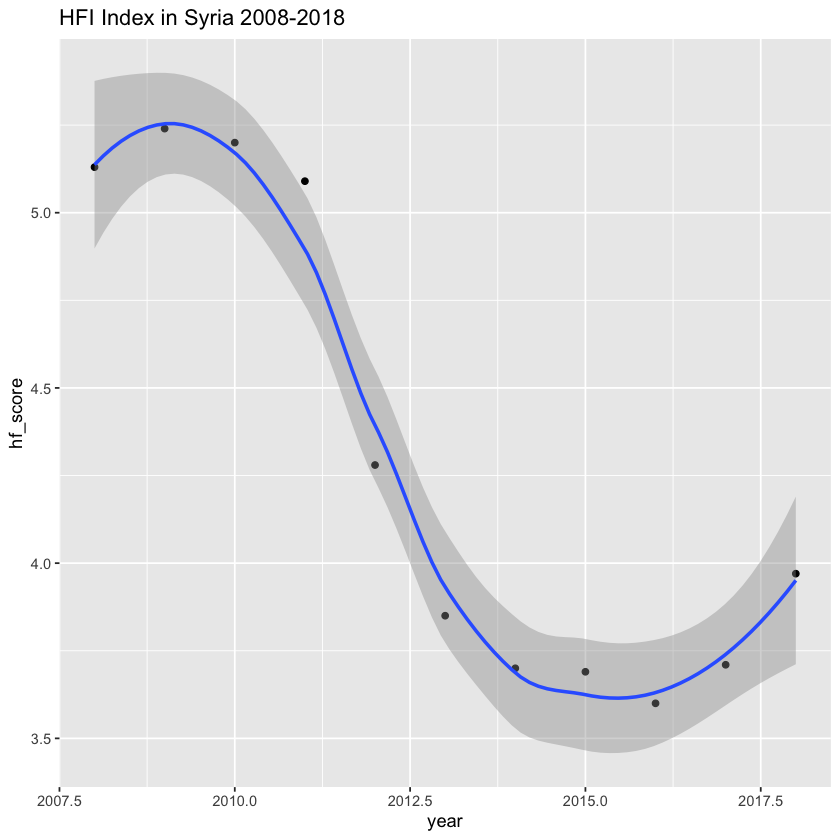

In [42]:
#plot regression line for Syria to look at it more closely
HFI_dev_Syria <- ggplot(HFI_syria, aes(year, hf_score)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Syria 2008-2018")
HFI_dev_Syria

#run the lm with log-transformed hfi scores to see if it fits better
lm_syria_log <- lm(log(HFI_syria$hf_score) ~ HFI_syria$year) 
summary(lm_syria_log)

Log-transforming did not improve the fit of the model. If anything, the R squared is now slightly lower! If I wanted a better fit, I'd probably have to fit a non-linear model here. 

### 3.3 A Closer Look at Female-Specific Freedoms

Now that I have looked into the development of HF scores over different regions and countries, I would like to take a closer look at female-specific freedom. It should be mentioned here that the women-specific measure has been aggregated from way less and also not corresponding variables compared to the HFI (the five indicators were female genital mutilation, equal inheritance rights, women’s freedom of movement, female-to-female relationships, and divorce) than the HFI. 
I hypothesize that the average of the female-specific HF score is lower than the aggregated one for both genders in some countries with a generally low HFI. I test this below: 

In [60]:
#run t-test to test for significant difference between average HFI worldwide (all genders) in 2018 and female-specific freedom index in 2018
t.test(HFI_2018$hf_score, HFI_2018$womens_freedom)

#filter for countries with the lowest 20 ranks in 2018 
HFI_2018_lowest <- HFI_2018 %>% filter(hf_rank > 142) 
#run t-test to test for significant difference between average HFI of the lowest-ranked countries in 2018 and their female-specific freedom index in 2018
t.test(HFI_2018_lowest$hf_score, HFI_2018_lowest$womens_freedom)

#filter for countries with the highest 20 ranks in 2018 
HFI_2018_highest <- HFI_2018 %>% filter(hf_rank < 21)
#run t-test to test for significant difference between average HFI of the highest-ranked countries in 2018 and their female-specific freedom index in 2018
t.test(HFI_2018_highest$hf_score, HFI_2018_highest$womens_freedom)


	Welch Two Sample t-test

data:  HFI_2018$hf_score and HFI_2018$womens_freedom
t = -5.4065, df = 230.85, p-value = 1.601e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.4974216 -0.6975166
sample estimates:
mean of x mean of y 
 6.933025  8.030494 



	Welch Two Sample t-test

data:  HFI_2018_lowest$hf_score and HFI_2018_lowest$womens_freedom
t = -0.24685, df = 20.37, p-value = 0.8075
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.543503  1.216503
sample estimates:
mean of x mean of y 
   4.9875    5.1510 



	Welch Two Sample t-test

data:  HFI_2018_highest$hf_score and HFI_2018_highest$womens_freedom
t = -22.806, df = 31.644, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.486968 -1.243032
sample estimates:
mean of x mean of y 
    8.561     9.926 


The outputs above show us that this is a great example for the infamous "apples & oranges" comparison and thus should be interpreted very cautiously. 
On average for all countries, there is a significant difference between the average HF score for all genders compared to the women-specific score. While worldwide, the average HF score in 2018 was 6.93, the average women-specific rating was 8.03. For the 20 lowest-ranked country, there was no significant difference between the two indices (p-value is > .5). For the 20 highest-ranked countries, there was again a significant difference with the mean HF score being 8.5 and the mean women-specific score being 9.9.
However, this does NOT mean that women have more freedom than men, it just means that the indicators for the women-specific index had a way lower bar than the ones measuring human freedom. It is (thankfully) easier for a country in 2018 to get the full score for not cutting parts of people's genitals off than for low taxes on international trade, and the HFI is aggregated from more of the latter kind of variables. 

### 3.4 The Relationship between Personal Freedom and Economic Freedom 
After seeing that the subtleties of how the HFI has been aggregated matter, I want to look into the two main factors it consists of: Personal Freedom and Economic Freedom. Specifically, I want to find out if there are  countries with high PF and low EF, and vice versa.
I also plan to use Pearson's product-moment correlation to find out if there is a significant correlation between these two variables. 

In [ ]:
# apply Pearson's product-moment correlation to find out if there is a significant correlation between PF and EF

£ The plots above show that...
In a second step, I would like to use a multiple regression model to find out if the correlation differs for different countries. Because "country" is a qualitative variable, I would have to create dummy variables for them.

### 3.5 Exploring the Predictors of HF
The HFI is calculated from numerous weighted variables. Next, I want to visualize which ones are the strongest predictors of HF in order to explore those in more detail.

In [ ]:
#predictors_correlated <- full_data %>% dplyr::select(Length, SUBTLWF, Concreteness_Rating, Emotional_Valence)
#cor(predictors_correlated) # create a correlation matrix of all four predictors

#library(Hmisc)

#Hmisc::rcorr(predictors_correlated %>% as.matrix()) #make a matrix with p-values for the correlations

#### 3.5.1 The Influence of Size of Government on HF

£ What does the correlation of the variable "size of government" with HFI look like? I plan to use Pearson's product-moment correlation to find out if there is a significant correlation between these two variables.

In [ ]:
# apply Pearson's product-moment correlation to find out if there is a significant correlation between Size of Government and HF
###cor_combined <- cor.test(filtered_data$steps, filtered_data$bmi)


#### 3.5.2 The Relationship between Business Regulations and HF
£ Are stricter business regulations associated with lower or higher HF? What about higher taxes? Again, I would use Pearson's product-moment correlation to find out if there is a significant correlation between the two variables.

In [ ]:
# apply Pearson's product-moment correlation to find out if there is a significant correlation between Size of Government and HF
###cor_combined <- cor.test(filtered_data$steps, filtered_data$bmi)

£ The plots above show that...

### 3.7 Building a Model to Predict HFI
£ In order to build a model which can predict HFI in the future, I would split my dataset in a group of 6 and one oof 5 years' worth of data and use the data from years 2008-2013 as training data. Then I could use the data from 2014-2018 to test my model. I plan to first try to fit a linear regression model and check its fit. If it does not show an aequate fit, I will try non-linear models.

£ The attained model...

### 3.8 Somehow throw Bootstrap in there

In [ ]:
# strap some boots

## 4. Conclusions
£

## Bibliography

Berlin, I. (1969). Four Essays On Liberty. Oxford University Press.

Vásquez, I., & McMahon, F. (2020). The Human Freedom Index 2020. Cato Institue and Fraser Institute. Retrieved from https://www.fraserinstitute.org/sites/default/files/human-freedom-index-2020.pdf 